In [1]:
import bokeh.sampledata
from bokeh.sampledata.glucose import data

In [2]:
week = data.loc['2010-10-01':'2010-10-08'] 

In [3]:
# Converts a Pandas Dataframe to a Spark one
sdf = spark.createDataFrame(week)

In [4]:
sdf.show()

+-----+-------+
| isig|glucose|
+-----+-------+
|13.56|     92|
|14.76|    100|
| 15.9|    108|
|16.74|    115|
|17.04|    120|
|17.56|    124|
|18.24|    128|
|18.84|    133|
|19.52|    137|
|20.22|    142|
|20.94|    147|
|21.62|    152|
|22.24|    157|
|22.88|    162|
|23.48|    167|
|23.98|    171|
|24.56|    175|
|25.32|    179|
|26.18|    185|
| 27.3|    192|
+-----+-------+
only showing top 20 rows



In [5]:
# Wraps a Spark DataFrame with Koalas
from databricks import koalas as ks
df = ks.DataFrame(sdf)

In [6]:
df

,isig,glucose
0,13.56,92
1,14.76,100
2,15.9,108
3,16.74,115
4,17.04,120
5,17.56,124
6,18.24,128
7,18.84,133
8,19.52,137
9,20.22,142


Loading BokehJS ...

GlyphRenderer(id='1282', ...)

'/home/jovyan/examples/koalas-plot.png'

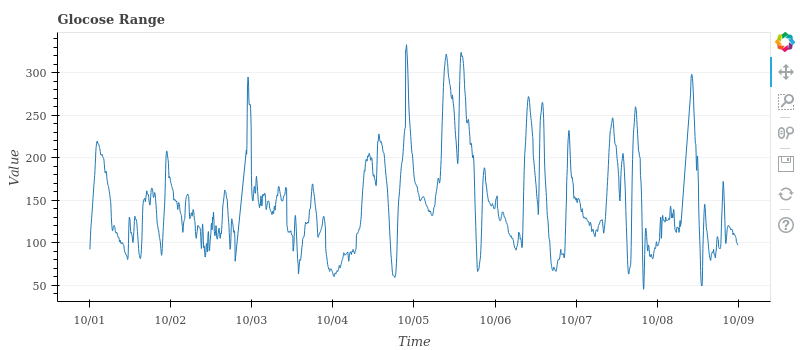

In [8]:
from bokeh.io import export_png, output_notebook, show
from bokeh.plotting import figure 
output_notebook()

p = figure(x_axis_type="datetime", plot_height=350, plot_width=800, title="Glocose Range")
p.line(x=week.index, y=week.glucose)
p.xgrid.grid_line_color=None
p.ygrid.grid_line_alpha=0.5
p.xaxis.axis_label='Time'
p.yaxis.axis_label='Value'
 
# show(p)
export_png(p, filename="koalas-plot.png")
Image('koalas-plot.png')